In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf

from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [4]:
print(os.listdir())

['numberpatterns.csv', 'IDN.csv', 'NIC_Old.csv', 'NIC.csv', 'pima-indians-diabetes.csv', '.ipynb_checkpoints', 'IDN_DataTest.ipynb']


In [5]:
df=pd.read_csv("NIC.csv")
df

,NIC_Nos
0,911232910V
1,937370580V
2,937784210V
3,940491240V
4,942251610V
...,...
5006,988190969V
5007,988330809V
5008,988501069V
5009,995150549V


In [6]:
#Data cleaning
df.isnull().sum()
missing_value = ["N/a","na",np.nan]
df=pd.read_csv("NIC.csv",na_values=missing_value)
df.isnull().any()

NIC_Nos    False
dtype: bool

In [7]:
df

,NIC_Nos
0,911232910V
1,937370580V
2,937784210V
3,940491240V
4,942251610V
...,...
5006,988190969V
5007,988330809V
5008,988501069V
5009,995150549V


In [8]:
#Separation of columns in dataset
df['1'] = df['NIC_Nos'].str[0:1]
df['2'] = df['NIC_Nos'].str[1:2]
df['3'] = df['NIC_Nos'].str[2:3]
df['4'] = df['NIC_Nos'].str[3:4]
df['5'] = df['NIC_Nos'].str[4:5]
df['6'] = df['NIC_Nos'].str[5:6]
df['7'] = df['NIC_Nos'].str[6:7]
df['8'] = df['NIC_Nos'].str[7:8]
df['Check_digit']=df['NIC_Nos'].str[8]

In [9]:
df.describe().transpose()

,count,unique,top,freq
NIC_Nos,5011,5007,968583646V,2
1,5011,1,9,5011
2,5011,9,7,2263
3,5011,8,7,1179
4,5011,10,5,560
5,5011,10,5,558
6,5011,7,0,1501
7,5011,10,2,549
8,5011,10,8,540
Check_digit,5011,10,0,939


In [10]:
df.head(5)

,NIC_Nos,1,2,3,4,5,6,7,8,Check_digit
0,911232910V,9,1,1,2,3,2,9,1,0
1,937370580V,9,3,7,3,7,0,5,8,0
2,937784210V,9,3,7,7,8,4,2,1,0
3,940491240V,9,4,0,4,9,1,2,4,0
4,942251610V,9,4,2,2,5,1,6,1,0


In [11]:
df.tail(5)

,NIC_Nos,1,2,3,4,5,6,7,8,Check_digit
5006,988190969V,9,8,8,1,9,0,9,6,9
5007,988330809V,9,8,8,3,3,0,8,0,9
5008,988501069V,9,8,8,5,0,1,0,6,9
5009,995150549V,9,9,5,1,5,0,5,4,9
5010,995291649V,9,9,5,2,9,1,6,4,9


<Figure size 720x432 with 0 Axes>

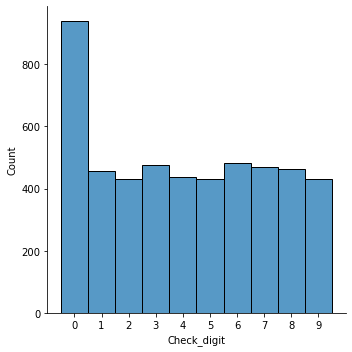

In [12]:
plt.figure(figsize=(10,6))
sns.displot(df['Check_digit'])

In [13]:
df.index=df['NIC_Nos']
df.index = df.NIC_Nos
df.drop("NIC_Nos", axis=1, inplace=True)
df

,1,2,3,4,5,6,7,8,Check_digit
NIC_Nos,,,,,,,,,
911232910V,9,1,1,2,3,2,9,1,0
937370580V,9,3,7,3,7,0,5,8,0
937784210V,9,3,7,7,8,4,2,1,0
940491240V,9,4,0,4,9,1,2,4,0
942251610V,9,4,2,2,5,1,6,1,0
...,...,...,...,...,...,...,...,...,...
988190969V,9,8,8,1,9,0,9,6,9
988330809V,9,8,8,3,3,0,8,0,9
988501069V,9,8,8,5,0,1,0,6,9


In [14]:
#Splitting dataset 
number_of_rows = len(df.index)
X = df[['1','2','3','4','5','6','7','8']].to_numpy(dtype = 'float32')

In [15]:
X = np.reshape(X, (number_of_rows,8))/10

In [16]:
y = df['Check_digit'].to_numpy(dtype = 'float32')

In [17]:
y = y.reshape(number_of_rows,1)

In [18]:
y = tf.keras.utils.to_categorical(y)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=101)

In [20]:
X_test.shape

(3508, 8)

In [21]:
y_test.shape

(3508, 10)

In [22]:
#dense the Keras model
model = Sequential()

In [23]:
#first hidden layer with 30 nodes using 'relu' activation function
model.add(Dense(30, activation='relu'))

#second hidden layer with 20 nodes
model.add(Dense(20, activation='relu'))

#output layer with 10 nodes using 'sigmoid' activation function
model.add(Dense(10, activation='softmax'))

In [24]:
#compile the Keras model
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
#fit the Keras model on the dataset
model.fit(X_train,y_train,epochs = 500,verbose = 1, validation_data= (X_test,y_test), batch_size = 300)

Epoch 1/500
6/6 [==============================] - 13s 54ms/step - loss: 2.3119 - accuracy: 0.1071 - val_loss: 2.3043 - val_accuracy: 0.1023
Epoch 2/500
6/6 [==============================] - 0s 4ms/step - loss: 2.3022 - accuracy: 0.1075 - val_loss: 2.2984 - val_accuracy: 0.1157
Epoch 3/500
6/6 [==============================] - 0s 4ms/step - loss: 2.2943 - accuracy: 0.1234 - val_loss: 2.2946 - val_accuracy: 0.1183
Epoch 4/500
6/6 [==============================] - 0s 4ms/step - loss: 2.2937 - accuracy: 0.1264 - val_loss: 2.2915 - val_accuracy: 0.1403
Epoch 5/500
6/6 [==============================] - 0s 4ms/step - loss: 2.2916 - accuracy: 0.1434 - val_loss: 2.2890 - val_accuracy: 0.1591
Epoch 6/500
6/6 [==============================] - 0s 4ms/step - loss: 2.2910 - accuracy: 0.1530 - val_loss: 2.2871 - val_accuracy: 0.1659
Epoch 7/500
6/6 [==============================] - 0s 4ms/step - loss: 2.2853 - accuracy: 0.1662 - val_loss: 2.2845 - val_accuracy: 0.1767
Epoch 8/500
6/6 [========

6/6 [==============================] - 0s 4ms/step - loss: 2.2555 - accuracy: 0.1826 - val_loss: 2.2708 - val_accuracy: 0.1890
Epoch 118/500
6/6 [==============================] - 0s 4ms/step - loss: 2.2593 - accuracy: 0.1709 - val_loss: 2.2705 - val_accuracy: 0.1873
Epoch 119/500
6/6 [==============================] - 0s 4ms/step - loss: 2.2548 - accuracy: 0.1802 - val_loss: 2.2702 - val_accuracy: 0.1876
Epoch 120/500
6/6 [==============================] - 0s 4ms/step - loss: 2.2562 - accuracy: 0.1761 - val_loss: 2.2699 - val_accuracy: 0.1867
Epoch 121/500
6/6 [==============================] - 0s 4ms/step - loss: 2.2480 - accuracy: 0.1825 - val_loss: 2.2695 - val_accuracy: 0.1876
Epoch 122/500
6/6 [==============================] - 0s 4ms/step - loss: 2.2494 - accuracy: 0.1801 - val_loss: 2.2699 - val_accuracy: 0.1867
Epoch 123/500
6/6 [==============================] - 0s 4ms/step - loss: 2.2547 - accuracy: 0.1745 - val_loss: 2.2713 - val_accuracy: 0.1864
Epoch 124/500
6/6 [========

6/6 [==============================] - 0s 4ms/step - loss: 2.2376 - accuracy: 0.1912 - val_loss: 2.2767 - val_accuracy: 0.1790
Epoch 234/500
6/6 [==============================] - 0s 4ms/step - loss: 2.2472 - accuracy: 0.1840 - val_loss: 2.2768 - val_accuracy: 0.1793
Epoch 235/500
6/6 [==============================] - 0s 4ms/step - loss: 2.2437 - accuracy: 0.1851 - val_loss: 2.2767 - val_accuracy: 0.1807
Epoch 236/500
6/6 [==============================] - 0s 4ms/step - loss: 2.2434 - accuracy: 0.1852 - val_loss: 2.2750 - val_accuracy: 0.1850
Epoch 237/500
6/6 [==============================] - 0s 4ms/step - loss: 2.2453 - accuracy: 0.1855 - val_loss: 2.2739 - val_accuracy: 0.1873
Epoch 238/500
6/6 [==============================] - 0s 4ms/step - loss: 2.2382 - accuracy: 0.1874 - val_loss: 2.2733 - val_accuracy: 0.1893
Epoch 239/500
6/6 [==============================] - 0s 4ms/step - loss: 2.2442 - accuracy: 0.1785 - val_loss: 2.2733 - val_accuracy: 0.1901
Epoch 240/500
6/6 [========

6/6 [==============================] - 0s 4ms/step - loss: 2.2367 - accuracy: 0.1798 - val_loss: 2.2810 - val_accuracy: 0.1802
Epoch 350/500
6/6 [==============================] - 0s 4ms/step - loss: 2.2398 - accuracy: 0.1851 - val_loss: 2.2800 - val_accuracy: 0.1799
Epoch 351/500
6/6 [==============================] - 0s 4ms/step - loss: 2.2322 - accuracy: 0.1807 - val_loss: 2.2798 - val_accuracy: 0.1787
Epoch 352/500
6/6 [==============================] - 0s 4ms/step - loss: 2.2346 - accuracy: 0.1891 - val_loss: 2.2793 - val_accuracy: 0.1813
Epoch 353/500
6/6 [==============================] - 0s 4ms/step - loss: 2.2319 - accuracy: 0.1866 - val_loss: 2.2791 - val_accuracy: 0.1813
Epoch 354/500
6/6 [==============================] - 0s 4ms/step - loss: 2.2242 - accuracy: 0.1949 - val_loss: 2.2784 - val_accuracy: 0.1842
Epoch 355/500
6/6 [==============================] - 0s 4ms/step - loss: 2.2363 - accuracy: 0.1852 - val_loss: 2.2781 - val_accuracy: 0.1842
Epoch 356/500
6/6 [========

6/6 [==============================] - 0s 4ms/step - loss: 2.2183 - accuracy: 0.1960 - val_loss: 2.2890 - val_accuracy: 0.1881
Epoch 466/500
6/6 [==============================] - 0s 4ms/step - loss: 2.2194 - accuracy: 0.1923 - val_loss: 2.2885 - val_accuracy: 0.1873
Epoch 467/500
6/6 [==============================] - 0s 4ms/step - loss: 2.2277 - accuracy: 0.1944 - val_loss: 2.2864 - val_accuracy: 0.1864
Epoch 468/500
6/6 [==============================] - 0s 4ms/step - loss: 2.2234 - accuracy: 0.1897 - val_loss: 2.2851 - val_accuracy: 0.1842
Epoch 469/500
6/6 [==============================] - 0s 4ms/step - loss: 2.2276 - accuracy: 0.1829 - val_loss: 2.2855 - val_accuracy: 0.1784
Epoch 470/500
6/6 [==============================] - 0s 4ms/step - loss: 2.2204 - accuracy: 0.1807 - val_loss: 2.2863 - val_accuracy: 0.1784
Epoch 471/500
6/6 [==============================] - 0s 4ms/step - loss: 2.2220 - accuracy: 0.1913 - val_loss: 2.2869 - val_accuracy: 0.1779
Epoch 472/500
6/6 [========

In [26]:
#evaluate the Keras model
_, accuracy = model.evaluate(X,y)
print('Accuracy: %.2f' % (accuracy*100))

157/157 [==============================] - 0s 394us/step - loss: 2.2705 - accuracy: 0.1780
Accuracy: 17.80


In [27]:
#make probability predictions with the model
X_new = [5,4,1,7,8,3,4,1]
X_new = np.reshape(X_new, (1,8))
y_new = model.predict(X_new)
for i in range(len(X_new)):
    print(np.argmax(i))
    print('\n')

0


